In [1]:
# importing Required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\2\\housing.csv")
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [3]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_ocean_proximity = LabelEncoder()
df.ocean_proximity= labelencoder_ocean_proximity.fit_transform(df.ocean_proximity)
print(labelencoder_ocean_proximity.fit_transform(df.ocean_proximity))

[3 3 3 ... 1 1 1]


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [6]:
df.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [7]:
#check for missing values
print(np.sum(np.isnan(df)))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
# Mean of total_bedrooms column
print("median is:",df['total_bedrooms'].median())
print("mode is:",df['total_bedrooms'].mode())
print("mean is:",df['total_bedrooms'].mean())

median is: 435.0
mode is: 0    280.0
dtype: float64
mean is: 537.8705525375618


In [9]:
# Replacing the null values in the Age column with Mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit and transform to the parameters
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])
# Checking for any null values
df['total_bedrooms'].isnull().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


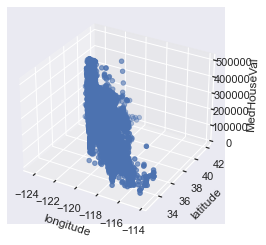

In [11]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['longitude']
y = df['latitude']
z = df['median_house_value']

ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_zlabel("MedHouseVal")

ax.scatter(x, y, z)

plt.show()

<AxesSubplot:xlabel='latitude', ylabel='median_house_value'>

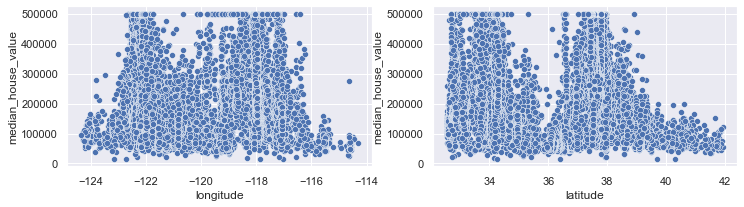

In [12]:
fig = plt.figure(figsize=(12,10))#GarageArea
plt.subplot(321)
sns.scatterplot(data=df, x='longitude', y="median_house_value")#YearBuilt
plt.subplot(322)
sns.scatterplot(data=df, x='latitude', y="median_house_value")

In [13]:
X = df.loc[:,(df.columns != 'median_house_value')]  
Y = df.median_house_value
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [14]:
X_train.shape

(14448, 9)

In [15]:
X_test.shape

(6192, 9)

In [16]:
Y_train.shape
Y_train

5748     238700.0
5592     171100.0
2110      55400.0
13901     69600.0
18425    213100.0
           ...   
10955    205300.0
17289    500001.0
5192     104800.0
12172    140700.0
235      126000.0
Name: median_house_value, Length: 14448, dtype: float64

In [17]:
rf = RandomForestRegressor(n_estimators=400, max_depth=50, random_state=1)

In [18]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=50, n_estimators=400, random_state=1)

In [19]:
rf.score(X_test,Y_test)

0.8142559856338079

In [20]:
# Use the forest's predict method on the test data
Y_pred = rf.predict(X_test)

In [21]:
# Calculate and display accuracy
errors = abs(Y_pred - Y_test)
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.34 %.


In [22]:
# Print out the mean absolute error (mae)
mean_absolute_error(Y_test,Y_pred)/(np.max(Y_test)-np.min(Y_test))

0.06641371871337391

In [23]:
# Print out the mean squared error (mse)
met.mean_squared_error(Y_test, Y_pred)**0.5/(np.max(Y_test)-np.min(Y_test))

0.10188832451613102